# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

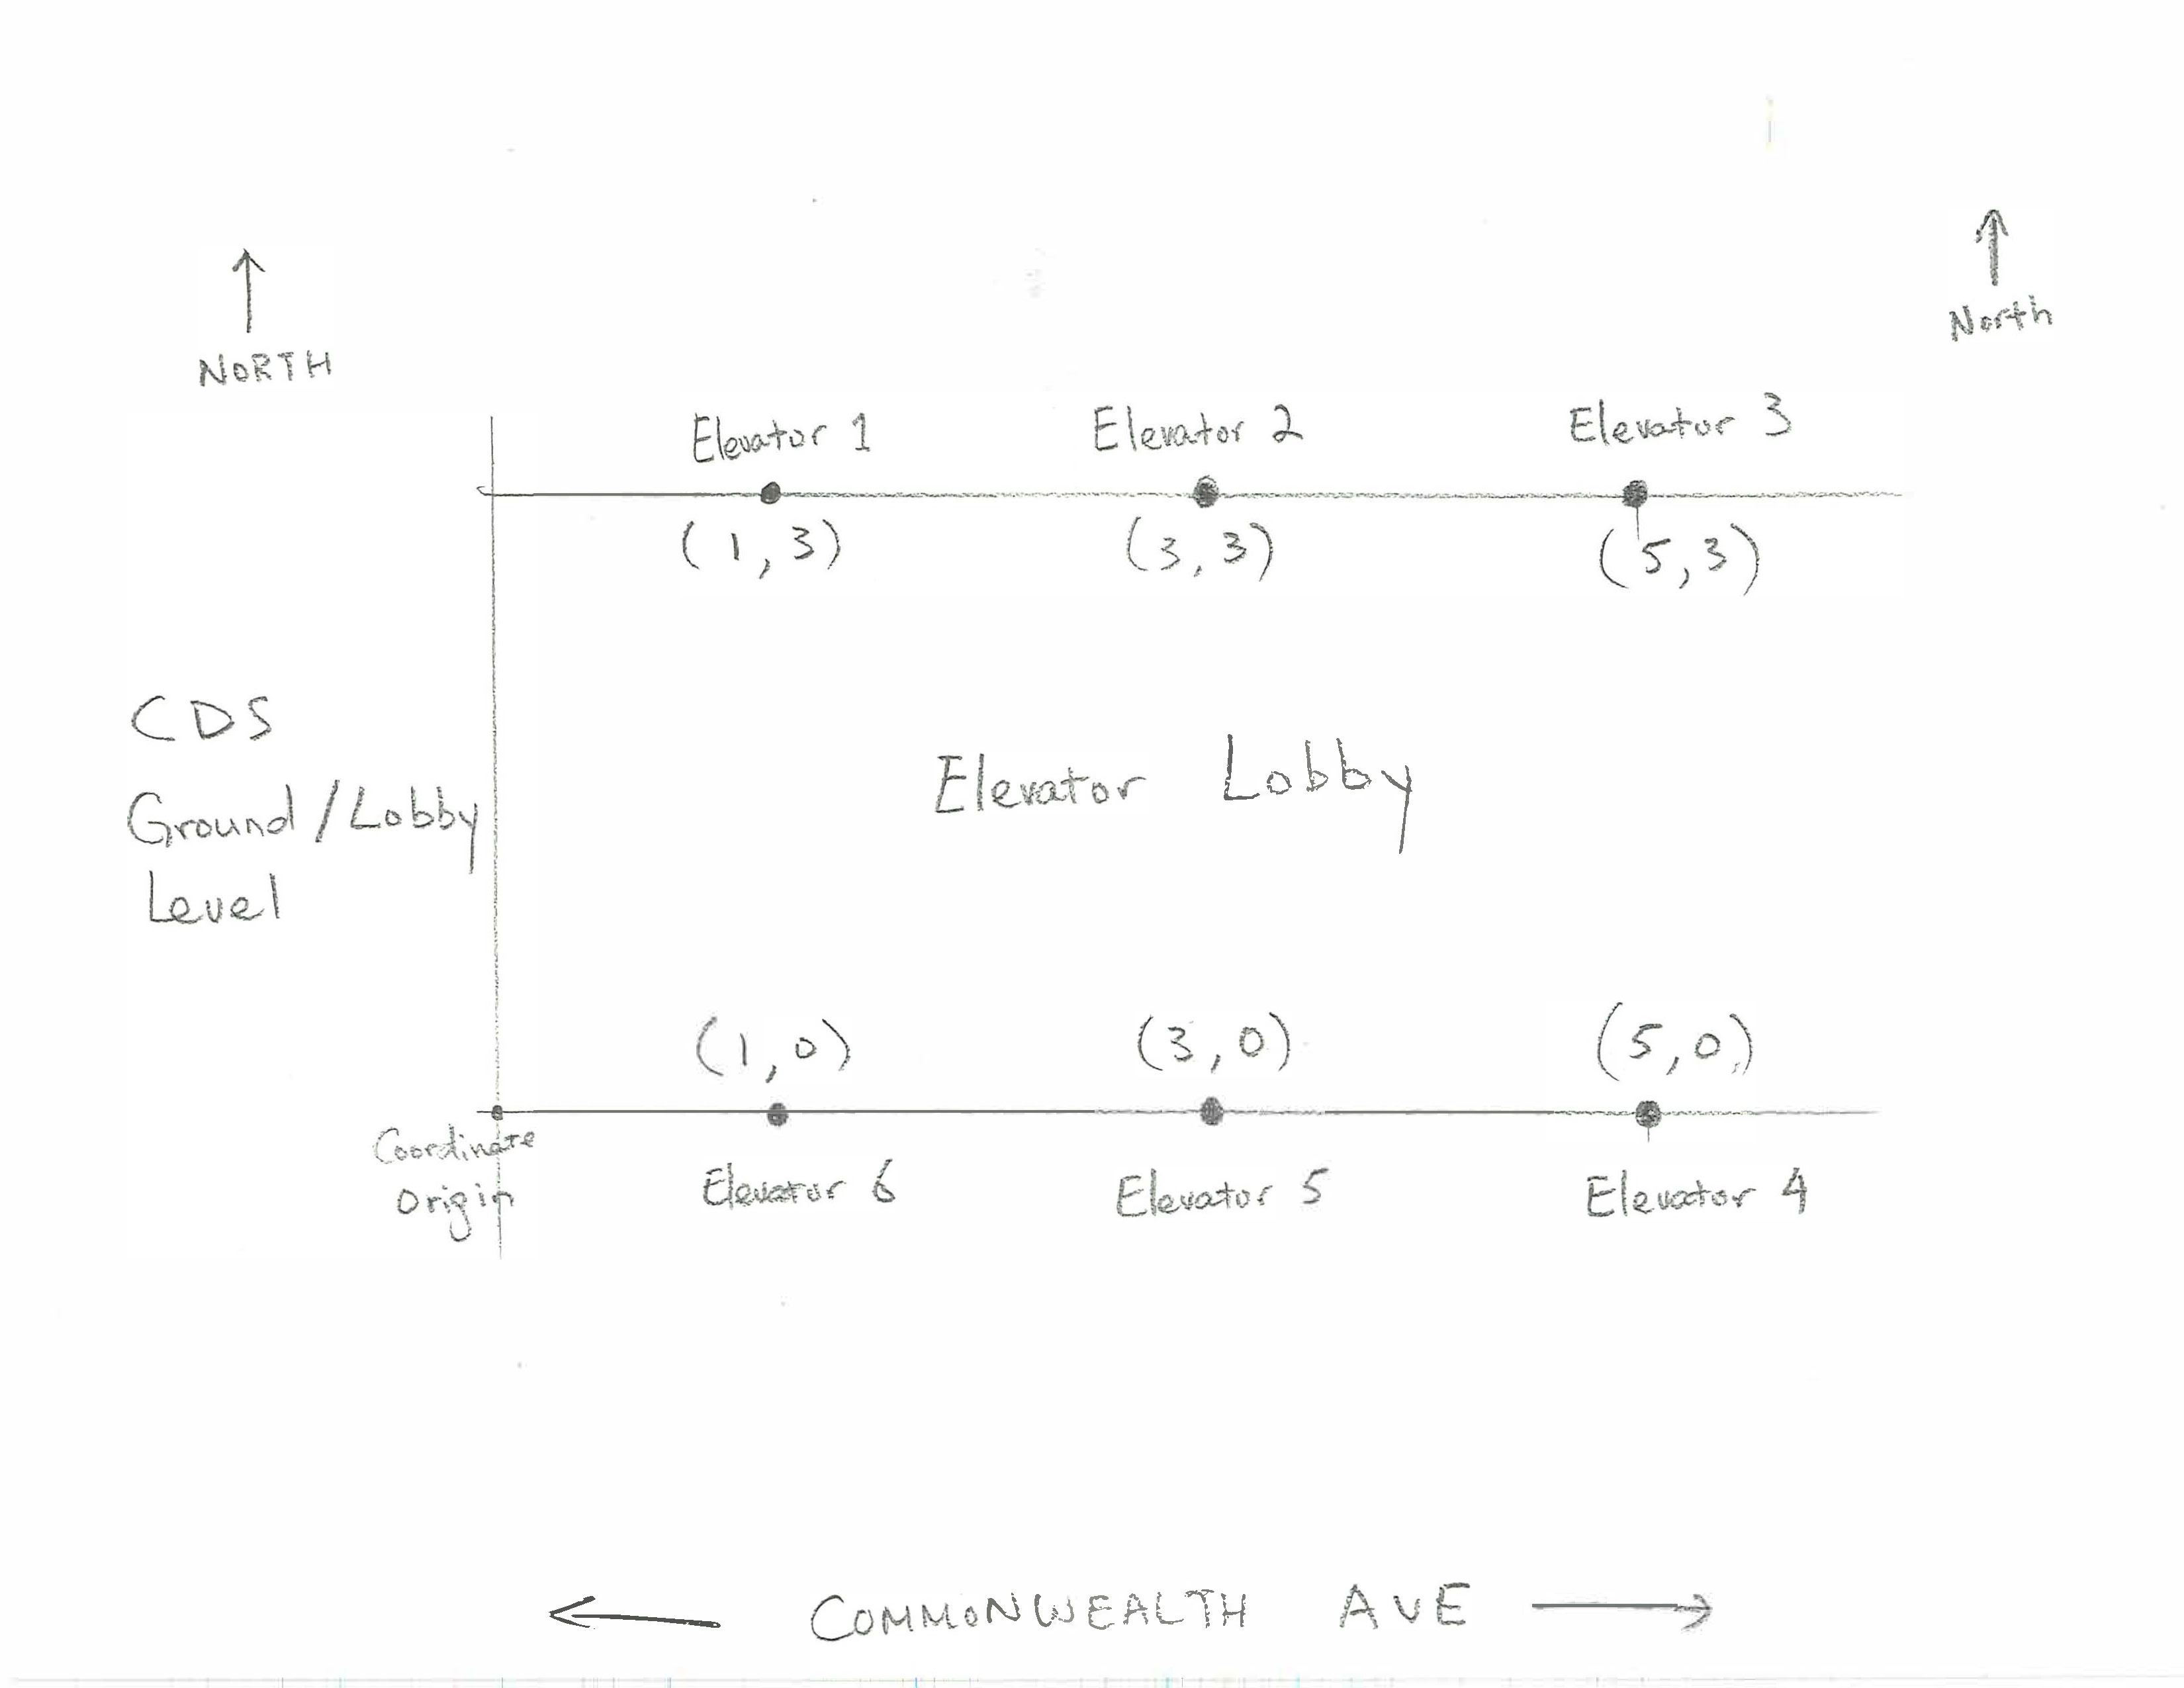

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** The optimal place to stand would be at coordinate (3,2). Since all elevators have an equal chance of arriving, the spot that would minimize walking distance to all the elevators would be in the center.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

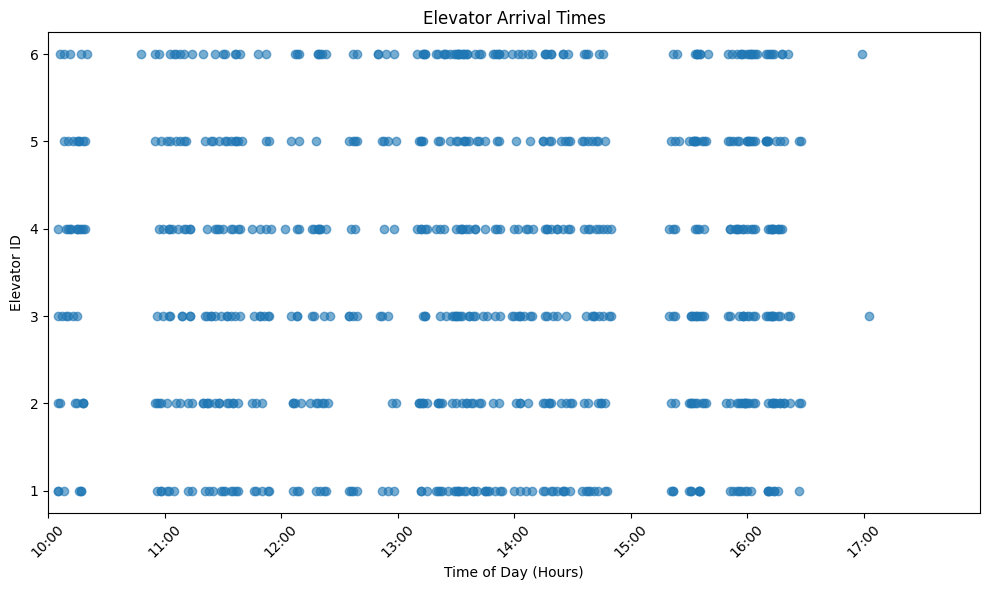

Unique data points: 702


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

def make_plot():
    # Load the data
    data = pd.read_csv('training_no_outliers.csv')
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    # Convert time to fractional hours
    data['TimeOfDay'] = data['Timestamp'].dt.hour + data['Timestamp'].dt.minute / 60.0

    # Filter to only include data from 9-16-24 and 9-17-24
    valid_dates = [pd.to_datetime('2024-09-16'), pd.to_datetime('2024-09-18')]
    data = data[data['Timestamp'].dt.date.isin([date.date() for date in valid_dates])]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(data['TimeOfDay'], data['Elevator ID'], alpha=0.6)

    # Set limits and ticks
    plt.xlim(10, 18)
    tick_hours = range(10, 18)
    plt.xticks(tick_hours)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):02d}:00'))

    plt.xticks(rotation=45)
    plt.xlabel('Time of Day (Hours)')
    plt.ylabel('Elevator ID')
    plt.title('Elevator Arrival Times')
    plt.tight_layout()
    plt.show()

    # Remove duplicate Timestamp and Elevator ID combinations
    unique_data_points = data[['Timestamp', 'Elevator ID']].drop_duplicates()
    print(f"Unique data points: {unique_data_points.shape[0]}")

make_plot()


State observations here (briefly).

Most elevators have a gap in activity at around 10:30 - 11:00, 13:10 - 13:20, and 14:50 - 15:20. The arrivals seem sparser in the morning and evenings. Arrivals become more frequent in the afternoon.  

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [9]:
def process_elevator_data(file_name):

    # Read the data
    df = pd.read_csv('training_no_outliers.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Filter to only include data from 9-16-24 and 9-17-24
    valid_dates = [pd.to_datetime('2024-09-16'), pd.to_datetime('2024-09-18')]
    df = df[df['Timestamp'].dt.date.isin([date.date() for date in valid_dates])]

    # Print the number of data points after filtering
    # print(f"Number of data points: {len(df)}")

    # Calculate total data collection time and number of arrivals per elevator
    elevator_groups = df.groupby('Elevator ID')
    elevator_times = elevator_groups['Timestamp'].agg(['min', 'max'])
    elevator_times['Total data collection time (seconds)'] = (elevator_times['max'] - elevator_times['min']).dt.total_seconds()

    elevator_counts = elevator_groups.size()

    # Calculate average frequency of arrivals per second
    elevator_frequencies = elevator_counts / elevator_times['Total data collection time (seconds)']

    final_table = pd.DataFrame({
        'Total data collection time (seconds)': elevator_times['Total data collection time (seconds)'].astype(int),
        'Number of arrivals': elevator_counts.astype(int),
        'Average frequency (arrivals per second)': elevator_frequencies.values
    }).T

    final_table.columns = elevator_frequencies.index.astype(int)

    return final_table

# Example usage:
result = process_elevator_data('training.csv')
print(result.to_string())


Elevator ID                                         1              2              3             4              5            6
Total data collection time (seconds)     195037.00000  195001.000000  197886.000000  195219.00000  195160.000000  195104.0000
Number of arrivals                          115.00000     121.000000     120.000000     119.00000     111.000000     117.0000
Average frequency (arrivals per second)       0.00059       0.000621       0.000606       0.00061       0.000569       0.0006


**Answer:** TODO
Since the elevators all have a very similar arrival frequency, the centroid remains to be the most optimal waiting position. If you choose to wait near one specific elevator, the benefit is very small. The walking distance trade-off may outweigh the improvement in waiting time.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 195037 | 195001 | 197886 | 195219 | 195160 |195104 |
| Number of arrivals | 115 | 121 | 120 | 119 | 111 |117 |
| Average frequency (arrivals per second) | 0.00059 | 0.000621 | 0.00606 | 0.00061 | 0.000569 |0.0006 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

**Answer:**

The probability of each elevator arriving can be calculated through summing up the total average frequencies then dividing the frequency of each elevator by this sum. Thus, the probability of each elevator being the next to arrive is directly related to its average frequency of arrivals. Elevator 2 has the highest probability of being the next to arrive, while Elevator 5 has the lowest probability.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.164 | 0.173 | 0.169 | 0.170 | 0.158 |0.167 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:** To find the optimal location to wait for an elevator, we use the sum of probabilities of each elevator arriving multiplied by the x and y coordinates of the corresponding elevator.

---


Optimal X = (1×0.164)+(3×0.173)+(5×0.169)+(5×0.170)+(3×0.158)+(1×0.167)

---


Optimal Y = (3×0.164)+(3×0.173)+(3×0.169)+(0×0.170)+(0×0.158)+(0×0.167)

---
Giving us the coordinates: (3.02, 1.52). This position balances the probabilities of each elevator arriving and minimizes the average walking distance to any elevator. Elevators 2, 3, and 4 have slightly higher probabilities of arriving next, so the optimal waiting point leans slightly toward the right of the elevator bank.



**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [13]:
import numpy as np

def distance(coord1, coord2):
    """
    Calculate the Euclidean distance between two points.
    """
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def get_average_walk_distance(file_name, coordinate, start_date, end_date):
    """
    Calculate the average walking distance to the elevator from a specified coordinate.
    """
    # Load data
    data = pd.read_csv(file_name)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    # Filter the data for points within the range
    filtered_data = data[(data['Timestamp'] >= pd.to_datetime(start_date)) &
                         (data['Timestamp'] <= pd.to_datetime(end_date))]

    # Print the total data points after filtering
    # total_data_points = len(filtered_data)
    # print(f"Total data points after filtering: {total_data_points}")

    elevator_coords = {
        1: (1, 3), 2: (3, 3), 3: (5, 3),
        4: (5, 0), 5: (3, 0), 6: (1, 0)
    }

    # Calculate distance for each row in the filtered data
    filtered_data = filtered_data.copy()  # Ensure you're working on a copy
    filtered_data['Distance'] = filtered_data['Elevator ID'].apply(lambda x: distance(coordinate, elevator_coords[x]))

    average_walk_distance = filtered_data['Distance'].mean()

    return average_walk_distance

# Example coordinates
centroid_coord = (3, 2)
optimal_coord = (3.02, 1.52)

start_training_date = '2024-09-16'
end_training_date = '2024-09-18'

average_distance_centroid_train = get_average_walk_distance('training_no_outliers.csv', centroid_coord, start_training_date, end_training_date)
average_distance_optimal_train = get_average_walk_distance('training_no_outliers.csv', optimal_coord, start_training_date, end_training_date)

# Print results
print(f"\nAverage Distance Walked (m) - Training Data")
print(f"Naive position (Question 1): {average_distance_centroid_train:.2f} m")
print(f"Smart position (Question 5): {average_distance_optimal_train:.2f} m")



Average Distance Walked (m) - Training Data
Naive position (Question 1): 2.19 m
Smart position (Question 5): 2.16 m


**Answer:**
Average Distance Walked (m) - Training Data


---


Naive position (Question 1): 2.18 m

---


Smart position (Question 5): 2.16 m

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.18 |   2.18 |
|Smart position (Question 5) | 2.16 |   2.16 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:**
Yes, the smart position does reduce average distance walked. Though the difference between the positions are relatively minimal, possibly due to a small sample of data.

In [14]:
# Test Data (filter for data after 9-18-24)
start_test_date = '2024-09-18'
end_test_date = '2024-09-20'

average_distance_centroid_test = get_average_walk_distance('training_no_outliers.csv', centroid_coord, start_test_date, end_test_date)
average_distance_optimal_test = get_average_walk_distance('training_no_outliers.csv', optimal_coord, start_test_date, end_test_date)
print(f"\nAverage Distance Walked (m) - Test Data")
print(f"Naive position (Question 1): {average_distance_centroid_test:.2f} m")
print(f"Smart position (Question 5): {average_distance_optimal_test:.2f} m")




Average Distance Walked (m) - Test Data
Naive position (Question 1): 2.18 m
Smart position (Question 5): 2.16 m
